<a href="https://colab.research.google.com/github/lakshminandu46/OIBSIP/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [27]:
df=pd.read_csv('CarPrice.csv')

In [ ]:
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.shape

(205, 26)

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df.dtypes

car_ID                int64
symboling             int64
CarName               int64
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
df.drop('car_ID', inplace=True, axis=1 )

In [28]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [29]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [30]:
df.CompanyName = df.CompanyName.str.lower()

def  name(a,b):
    df.CompanyName.replace(a,b,inplace=True)

name('maxda','mazda')
name('porcshce','porsche')
name('toyouta','toyota')
name('vokswagen','volkswagen')
name('vw','volkswagen')

df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [31]:
df.isnull().sum()

car_ID              0
symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [32]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<Axes: >

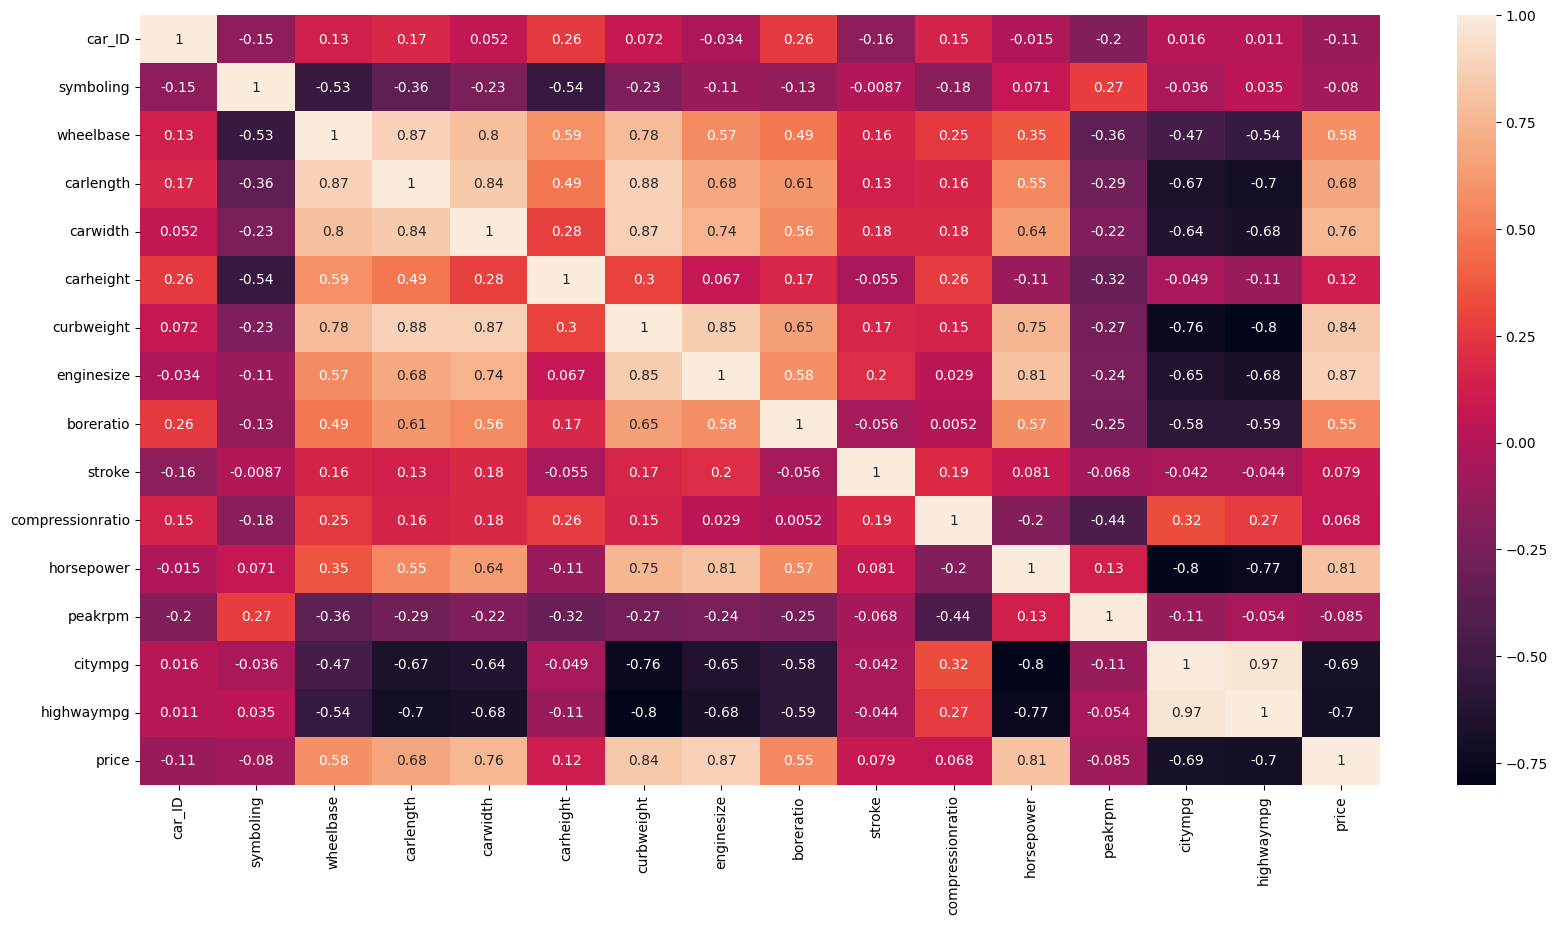

In [33]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

car_ID                 Axes(0.125,0.747241;0.133621x0.132759)
symboling           Axes(0.285345,0.747241;0.133621x0.132759)
wheelbase            Axes(0.44569,0.747241;0.133621x0.132759)
carlength           Axes(0.606034,0.747241;0.133621x0.132759)
carwidth            Axes(0.766379,0.747241;0.133621x0.132759)
carheight              Axes(0.125,0.587931;0.133621x0.132759)
curbweight          Axes(0.285345,0.587931;0.133621x0.132759)
enginesize           Axes(0.44569,0.587931;0.133621x0.132759)
boreratio           Axes(0.606034,0.587931;0.133621x0.132759)
stroke              Axes(0.766379,0.587931;0.133621x0.132759)
compressionratio       Axes(0.125,0.428621;0.133621x0.132759)
horsepower          Axes(0.285345,0.428621;0.133621x0.132759)
peakrpm              Axes(0.44569,0.428621;0.133621x0.132759)
citympg             Axes(0.606034,0.428621;0.133621x0.132759)
highwaympg          Axes(0.766379,0.428621;0.133621x0.132759)
price                   Axes(0.125,0.26931;0.133621x0.132759)
dtype: o

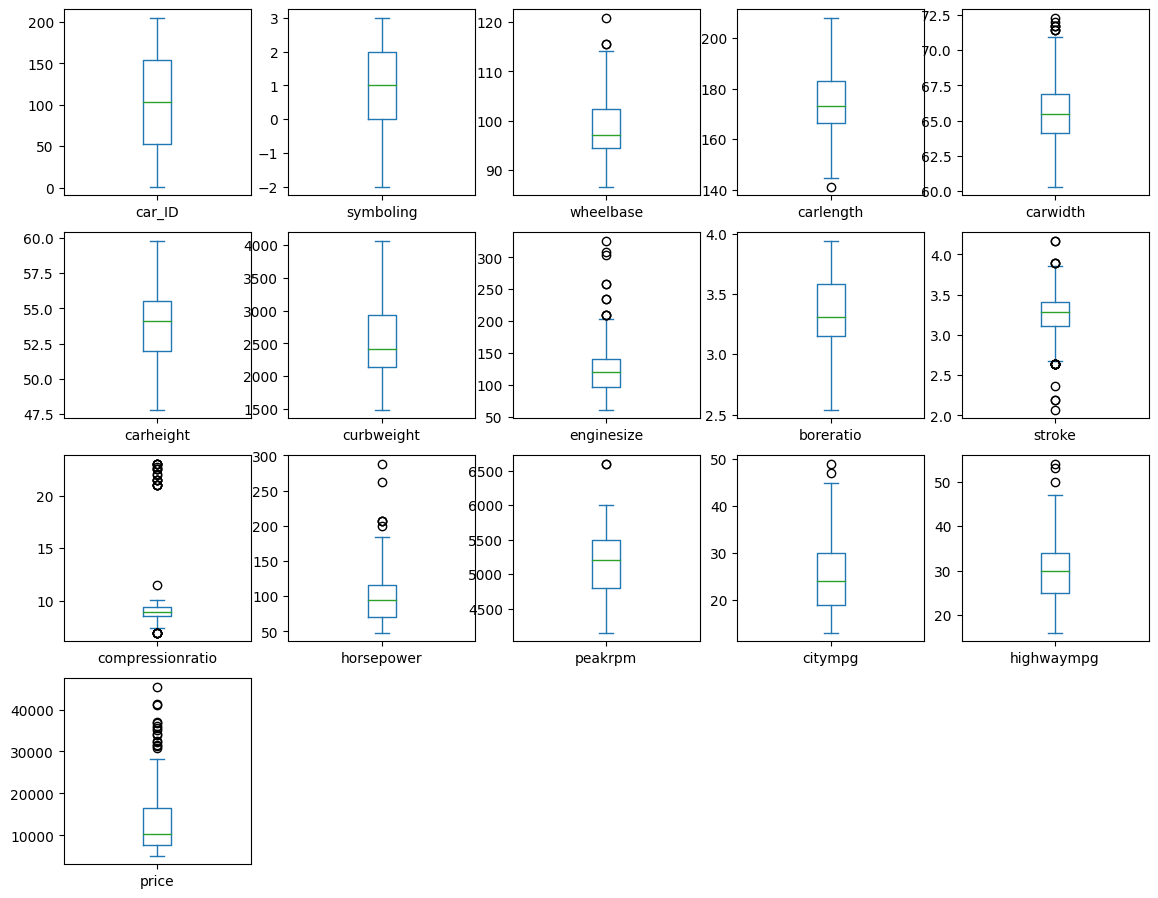

In [34]:
df.plot(kind='box', subplots=True, layout=(5, 5), figsize=(14, 14))

In [35]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False)

compressionratio    28
stroke              20
price               15
enginesize          10
carwidth             8
horsepower           6
wheelbase            3
highwaympg           3
peakrpm              2
citympg              2
carlength            1
symboling            0
fueltype             0
fuelsystem           0
enginetype           0
CompanyName          0
enginelocation       0
aspiration           0
doornumber           0
cylindernumber       0
curbweight           0
carheight            0
carbody              0
car_ID               0
boreratio            0
drivewheel           0
dtype: int64

In [36]:
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p
    return df

In [37]:
outlier_detect(df)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173.0,mpfi,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145.0,idi,3.01,3.40,9.0,106.0,4800.0,26.0,27.0,22470.0


In [38]:
col_list = []
for col in df.columns:
    if ((df[col].dtype == 'object') ):
        col_list.append(col)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in col_list:
    df[i]=labelencoder.fit_transform(df[i])
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
calc_vif(df)

,variables,VIF
0,car_ID,237.668594
1,symboling,4.229869
2,CompanyName,299.609409
3,fueltype,37.139959
4,aspiration,2.534452
5,doornumber,5.075093
6,carbody,29.615922
7,drivewheel,20.014467
8,enginelocation,2.198366
9,wheelbase,2088.866165


In [39]:
df.drop(columns=['doornumber','aspiration' ,'symboling' ,'doornumber','enginelocation'], inplace=True, axis=1) #'aspiration' 'symboling' 'doornumber'
x=df.drop(columns=['price'], axis=1)
y=df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 21)
(41, 21)
(164,)
(41,)


In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [41]:
# constant (b - bias)
model.intercept_

# coefficients (w - weights)
model.coef_

array([ 2870.50201432, -3664.12575604, -1538.61297875,   682.65803553,
         -43.71973283,  1585.09877389,  -825.60490699,  1367.02831209,
         188.06834379, -2978.53778432,   -47.21113586,   172.74382279,
        1877.50080274,   734.62934621,  -656.32945917, -1026.3413824 ,
         301.54948704,   966.14211873,  -407.73349694, -2494.50575683,
         126.68888332])

In [42]:
y_pred=model.predict(X_test)
y_pred.dtype

dtype('float64')

In [43]:
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(rmse)
r2_score=r2_score(y_test,y_pred)
print(r2_score*100)

2914.480735041881
62.81228749533712


In [44]:
from sklearn.tree import DecisionTreeRegressor
DTRmodel = DecisionTreeRegressor(max_depth=5,random_state=0)
DTRmodel.fit(X_train,y_train)
y_pred1 = DTRmodel.predict(X_test)
print('Accuracy:',DTRmodel.score(X_test, y_test)*100)

Accuracy: 73.33477275678459


In [45]:
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=5, max_depth=15)
rf1.fit(X_train,y_train)
y_pred1 = rf1.predict(X_test)
print('Accuracy:',rf1.score(X_test, y_test)*100)

Accuracy: 88.3584083458812


In [46]:
Train_score = rf1.score(X_train, y_train)

# Calculate the R-squared value for the test data
Test_score = rf1.score(X_test, y_test)

# Print the R-squared values for both the train and test data
print("Train data R-squared value :", Train_score*100)
print("Test data R-squared value :", Test_score*100)

Train data R-squared value : 97.19433233113723
Test data R-squared value : 88.3584083458812


In [47]:
act_predict= pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predict': y_pred.flatten()})
act_predict.head(6)

,Actual,Predict
0,6669.0,6844.674323
1,7999.0,7506.094999
2,6338.0,6713.551589
3,8916.5,6745.982768
4,10295.0,4960.889244
5,25552.0,24218.586648


import numpy as np
from google.colab import autoviz
df_7301908305733441133 = autoviz.get_registered_df('df_7301908305733441133')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7301908305733441133, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7301908305733441133 = autoviz.get_registered_df('df_7301908305733441133')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7301908305733441133, *['Predict'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7301908305733441133 = autoviz.get_registered_df('df_7301908305733441133')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7301908305733441133, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7301908305733441133 = autoviz.get_registered_df('df_7301908305733441133')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7301908305733441133, *['Predict'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7301908305733441133 = autoviz.get_registered_df('df_7301908305733441133')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_7301908305733441133, *[[['Actual', 'Predict']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_7301908305733441133 = autoviz.get_registered_df('df_7301908305733441133')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7301908305733441133, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7301908305733441133 = autoviz.get_registered_df('df_7301908305733441133')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7301908305733441133, *['Predict'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7301908305733441133 = autoviz.get_registered_df('df_7301908305733441133')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7301908305733441133, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7301908305733441133 = autoviz.get_registered_df('df_7301908305733441133')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7301908305733441133, *['Predict'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7301908305733441133 = autoviz.get_registered_df('df_7301908305733441133')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_7301908305733441133, *[[['Actual', 'Predict']]], **{})
chart